In [1]:
#!conda install mpl_toolkits
# todo: Bar chart with Plotly Express, MAP
#from mpl_toolkits.basemap import Basemap as Basemap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import sparse # shrink file size of df
# pw will calculate DISTANCES (0..N) BASED on cosine similarity
from sklearn.metrics.pairwise import pairwise_distances

#import requests
#import os
#import zipfile, io

In [3]:
df_raw = pd.read_csv('./datasets/MERGED2017_18_PP.csv', low_memory = False)
# MN_EARN_WNE_P10, Mean (MN_EARN_WNE_P*) and median (MD_EARN_WNE_P*) earnings 
# Data are available for each year starting six years after a student enrolls in college, up to 10 years after the student enrolls; 
df_raw_1415 = pd.read_csv('./datasets/MERGED2014_15_PP.csv', low_memory = False)#Treasury calculated data elements are available for the 2004-05 and 2005-06 pooled cohort (see 2005_06 file);

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(1862), int64(14), object(101)
memory usage: 107.3+ MB


In [5]:
cols_of_interest = ['UNITID', # unique identification number assigned to postsecondary institutions as surveyed through IPEDS - Integrated Postsecondary Education Data System
                    'INSTNM', #  institution’s name
                    'CITY', 'STABBR', 
                    'NUMBRANCH', #  the number of branch campuses at that institution
                    'MAIN', # Main Campus/Branch 
                    'HIGHDEG', # identifies the highest award level conferred at the institution
                    'PREDDEG', #  identifies the type of award that the institution primarily confers9
                    'CONTROL', # identifies whether the institution’s governance structure is public, private nonprofit, or private for-profit.
                    'DISTANCEONLY', 
                    'TUITIONFEE_IN',  # Average Cost of Attendance, Tuition and Fees 
                    'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'TUITFTE',
                    'AVGFACSAL', #The average faculty salary 
                    'RELAFFIL', #  identified by their religious affiliation
                    'ADM_RATE_ALL', 
                    'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75','SATVRMID', 'SATMTMID',
                    'SAT_AVG_ALL', 
                    'ACTCM25', 'ACTCM75', 
                    'ACTCMMID', 'ACTENMID', 'ACTMTMID', 
                    'PCIP01', 'PCIP03','PCIP04','PCIP05','PCIP09','PCIP10','PCIP11',
                    'PCIP12', 'PCIP13','PCIP14','PCIP15','PCIP16','PCIP19', #  the percentage of degrees awarded in each two-digit CIP code category of academic areas. 
                    'PCIP22','PCIP23','PCIP24','PCIP25','PCIP26','PCIP27','PCIP29', # the percentage of degrees awarded in each two-digit CIP code category of academic areas. 
                    'PCIP30','PCIP31','PCIP38','PCIP39','PCIP40','PCIP41','PCIP42',
                    'PCIP43','PCIP44','PCIP45','PCIP46','PCIP47','PCIP48','PCIP49',
                    'PCIP50','PCIP51','PCIP52','PCIP54',
                    'UGDS', # number of degree/certificate-seeking undergraduates enrolled 
                    'UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN', #Undergraduate Student Body by Race and Gender
                    'UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_NRA','UGDS_UNKN',  #Number of Undergraduate Students 
                    'UG25ABV', # Undergraduate Student Body by Age who are ages 25 and over
                    'PPTUG_EF', # Undergraduate Students by Part-Time/Full-Time Status 
                    'COSTT4_A','COSTT4_P', # Average Cost of Attendance, Tuition and Fees 
                    'INEXPFTE', #Instructional expenditures per FTE student                
                    'C150_4', #Completion Rates for 4 year college
                    'RET_FT4','RET_FTL4', #Retention Rate - return to the institution after the first year
                    'PCTFLOAN', # Percent of Undergraduates Receiving Federal Loans 
                    'OPENADMP', # OPENADMP
                    'DEBT_MDN', #  the sum of all undergraduate federal loans over students’ college education at the institution
                    'CDR3', #  repayment Cohort Default Rate, The three-year cohort default rate (CDR3) represents a snapshot in time. 
                   ]

df_clean = df_raw[cols_of_interest]
cols_of_interest_1415 = ['UNITID',  
                         'MN_EARN_WNE_P10', # Mean (MN_EARN_WNE_P*) earnings
                        ]
df_1415 = df_raw_1415[cols_of_interest_1415]

In [6]:
df_clean.shape, df_1415.shape

((7112, 89), (7703, 2))

In [7]:
df_clean.rename( columns = lambda col: col.strip().lower(), inplace = True )
df_1415.rename( columns = lambda col: col.strip().lower(), inplace = True )

C:\Users\yingr\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [8]:
df_clean.to_csv('./datasets/df_col_interest.csv')
df_1415.to_csv('./datasets/df_1415.csv')

## Colleges in datasets

In [9]:
tot_number_states = df_clean.stabbr.value_counts().count()
df_clean.stabbr.value_counts().values

array([716, 452, 446, 412, 378, 317, 277, 194, 188, 180, 178, 177, 176,
       175, 162, 155, 146, 131, 129, 125, 123, 119, 113, 110, 109, 101,
        94,  91,  89,  88,  87,  84,  83,  75,  74,  61,  49,  49,  41,
        40,  40,  37,  33,  30,  29,  26,  25,  25,  24,  20,  10,   9,
         3,   2,   1,   1,   1,   1,   1], dtype=int64)

In [10]:
df_clean.stabbr.value_counts().sum()

7112

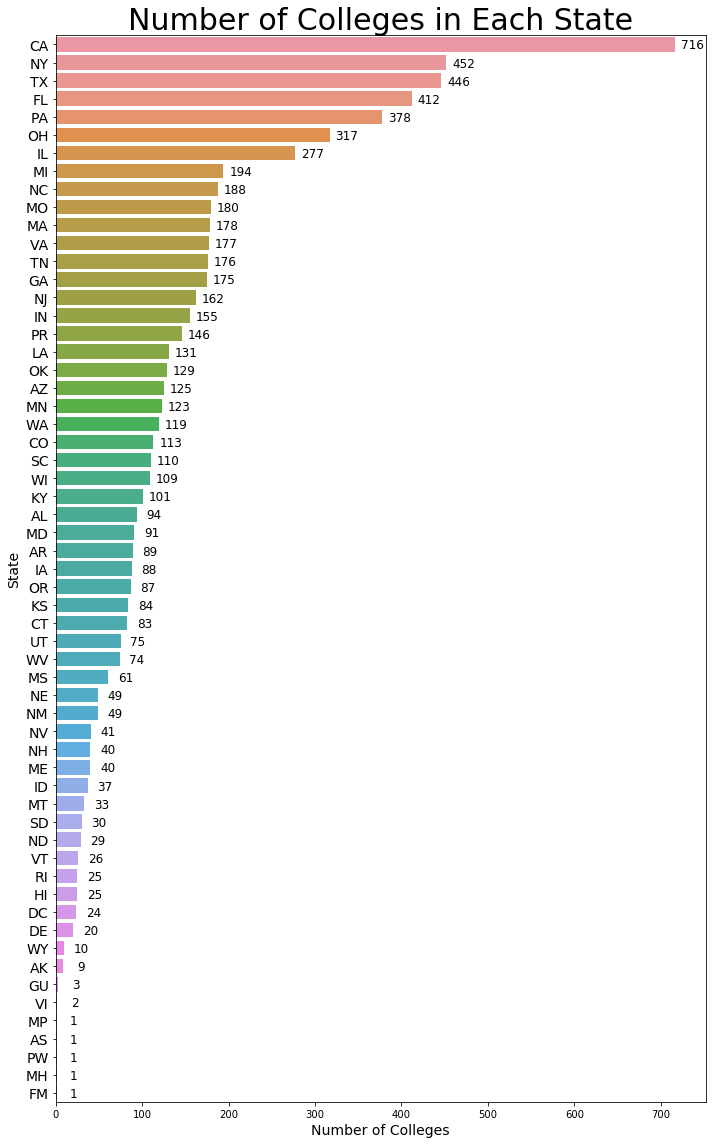

In [11]:
#plot
plt.figure(figsize = (10, 16))
ax = sns.barplot(df_clean.stabbr.value_counts().values,
           list(df_clean.stabbr.value_counts().index),
           
           )
for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center', fontsize = 12)
plt.title('Number of Colleges in Each State', fontsize =30)
plt.xlabel('Number of Colleges', fontsize = 14)
plt.ylabel('State', fontsize = 14)

plt.yticks(fontsize = 14)
plt.tight_layout();
plt.savefig("./plots/number_colleges_states.png")

 ## Type of colleges' governance structure - public, private nonprofit, or private for-profit

In [12]:
gov_counts=df_clean.control.value_counts()
gov_counts

3    2995
1    2076
2    2041
Name: control, dtype: int64

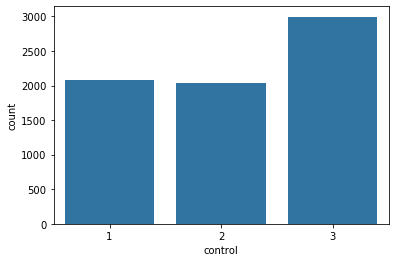

In [13]:
sns.countplot(data = df_clean, x = 'control', color = sns.color_palette()[0]);
#locs, labels = plt.xticks() 
plt.savefig("./plots/governance.png")

## What are different degrees offered
highest award level conferred at the institution

HIGHDEG is the highest category of award conferred by the institution, in descending order of graduate degree/certificate, bachelor’s degree, associate’s degree, and certificate, 0 means intership (e.g. medical hospital)

In [14]:
highdeg_counts=df_clean.highdeg.value_counts().sort_index()
highdeg_counts

0     475
1    2279
2    1518
3     788
4    2052
Name: highdeg, dtype: int64

In [15]:
preddeg_counts=df_clean.preddeg.value_counts().sort_index()
preddeg_counts

0     448
1    3010
2    1235
3    2109
4     310
Name: preddeg, dtype: int64

In [16]:
#df_clean.groupby(['preddeg', 'highdeg']).size().reset_index(name = 'count')

In [17]:
preddeg_counts, highdeg_counts

(0     448
 1    3010
 2    1235
 3    2109
 4     310
 Name: preddeg, dtype: int64, 0     475
 1    2279
 2    1518
 3     788
 4    2052
 Name: highdeg, dtype: int64)

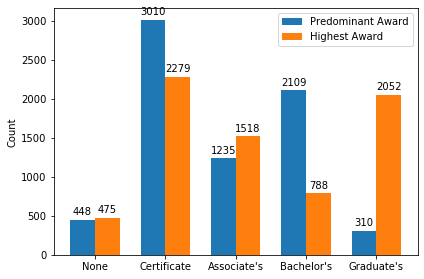

In [18]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
#labels = ['G1', 'G2', 'G3', 'G4', 'G5']
#men_means = [20, 34, 30, 35, 27]
#women_means = [25, 32, 34, 20, 25]
#preddeg_counts = df_clean.preddeg.value_counts(sort = False).values 
#highdeg_counts = df_clean.highdeg.value_counts(sort = False).values
#rects1 = plt.bar(ind, preddeg_counts, width, color = 'red')
#rects2 = plt.bar(ind + width, highdeg_counts, width, color = 'blue')
labels = ["None","Certificate", "Associate's", "Bachelor's", "Graduate's"]
x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, men_means, width, label='Men')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')
rects1 = ax.bar(x - width/2, preddeg_counts, width, label='Predominant Award')
rects2 = ax.bar(x + width/2, highdeg_counts, width, label='Highest Award')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
#ax.set_title('Degrees')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("./plots/degree.png")

 ## Net Tuition Revenue per full-time equivalent (FTE) student 

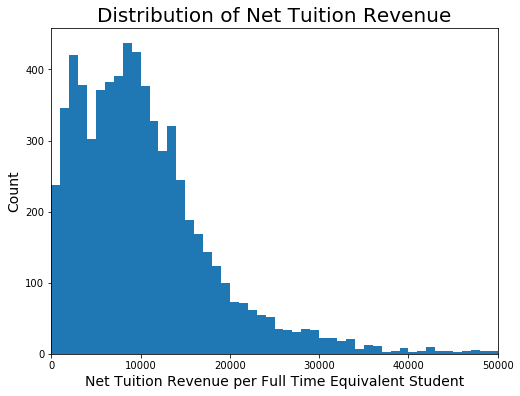

In [19]:
plt.figure(figsize = (8,6))
bins = np.arange(0, df_clean.tuitfte.max(), 1000)
plt.hist(df_clean.tuitfte, bins = bins);
plt.xlim(0,50000);
plt.title('Distribution of Net Tuition Revenue', fontsize = 20)
plt.xlabel('Net Tuition Revenue per Full Time Equivalent Student', fontsize = 14)
plt.ylabel('Count', fontsize = 14);
plt.savefig('./plots/tuitfte.png')

In [20]:
df_clean.tuitfte.describe()

count      6644.000000
mean      10767.397351
std       12535.327041
min           0.000000
25%        4918.000000
50%        9155.500000
75%       13906.250000
max      712078.000000
Name: tuitfte, dtype: float64

In [21]:
df_clean.tuitfte.quantile(q=0.5 )

9155.5

In [22]:
df_clean[df_clean.tuitfte>=100_000][['instnm','control','tuitfte']].sort_values(by='tuitfte')

,instnm,control,tuitfte
3080,Pennsylvania State University-College of Medicine,1,100875.0
3620,SIT Graduate Institute,2,182025.0
5830,Mauna Loa Helicopters,3,274624.0
4918,Ultimate Medical Academy-Clearwater,2,712078.0


In [23]:
less_median=df_clean[ df_clean.tuitfte < (df_clean.tuitfte.quantile(q=0.5 ))]['control'].value_counts()
more_median=df_clean[ df_clean.tuitfte >= (df_clean.tuitfte.quantile(q=0.5 ))]['control'].value_counts()

less_median=pd.DataFrame(less_median)
less_median.rename(columns={'control': 'tuitfte less than median'}, inplace=True)
less_median.index.rename('control', inplace=True)

more_median=pd.DataFrame(more_median)
more_median.rename(columns={'control': 'tuitfte more than median'}, inplace=True)
more_median.index.rename('control', inplace=True)

df_merged=less_median.merge(more_median, on='control').sort_index()
df_merged.rename(index={1: 'Public', 2:'Private Non-Profit',3:'Private For-Profit'}, inplace=True)
df_merged

,tuitfte less than median,tuitfte more than median
control,,
Public,1737,246
Private Non-Profit,440,1455
Private For-Profit,1145,1621


## Faculty Salary

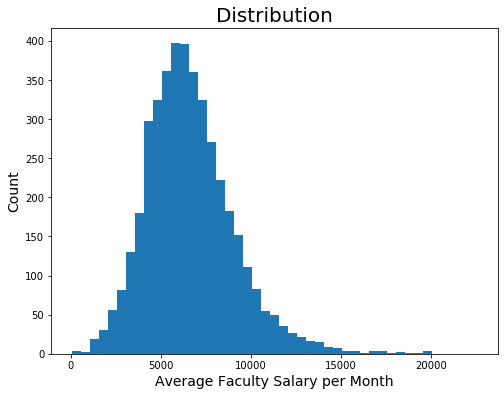

In [24]:
bins = np.arange(50, df_clean.avgfacsal.max() , 500)

plt.figure(figsize = (8, 6))
plt.hist(df_clean.avgfacsal, bins = bins)

plt.title('Distribution', fontsize = 20)
plt.xlabel('Average Faculty Salary per Month', fontsize = 14)
plt.ylabel('Count', fontsize = 14);
plt.savefig('./plots/avgfacsal.png')

In [25]:
df_clean.avgfacsal.describe()

count     4245.000000
mean      6617.939694
std       2459.212319
min          0.000000
25%       4965.000000
50%       6364.000000
75%       7947.000000
max      22924.000000
Name: avgfacsal, dtype: float64

In [26]:
df_clean[df_clean.avgfacsal>=18_000][['instnm','control','avgfacsal']].sort_values(by='avgfacsal')

,instnm,control,avgfacsal
930,University of Chicago,2,18115.0
1575,Massachusetts Institute of Technology,2,18182.0
2233,Columbia University in the City of New York,2,18713.0
2379,Rockefeller University,2,19180.0
212,California Institute of Technology,2,19600.0
2347,New York Law School,2,19681.0
1557,Harvard University,2,19741.0
3979,Stanford University,2,22924.0


In [27]:
less_median=df_clean[ df_clean.avgfacsal < (df_clean.avgfacsal.quantile(q=0.5 ))]['control'].value_counts()
more_median=df_clean[ df_clean.avgfacsal >= (df_clean.avgfacsal.quantile(q=0.5 ))]['control'].value_counts()

less_median=pd.DataFrame(less_median)
less_median.rename(columns={'control': 'avgfacsal less than median'}, inplace=True)
less_median.index.rename('control', inplace=True)

more_median=pd.DataFrame(more_median)
more_median.rename(columns={'control': 'avgfacsal more than median'}, inplace=True)
more_median.index.rename('control', inplace=True)

df_merged=less_median.merge(more_median, on='control').sort_index()
df_merged.rename(index={1: 'Public', 2:'Private Non-Profit',3:'Private For-Profit'}, inplace=True)
df_merged
#plt.savefig('./plots/avgfacsal-1.png')

,avgfacsal less than median,avgfacsal more than median
control,,
Public,558,1086
Private Non-Profit,789,905
Private For-Profit,774,133


## Admission Rate

In [28]:
df_clean.adm_rate_all.describe()

count    2250.000000
mean        0.685316
std         0.205749
min         0.000000
25%         0.560169
50%         0.710218
75%         0.835517
max         1.000000
Name: adm_rate_all, dtype: float64

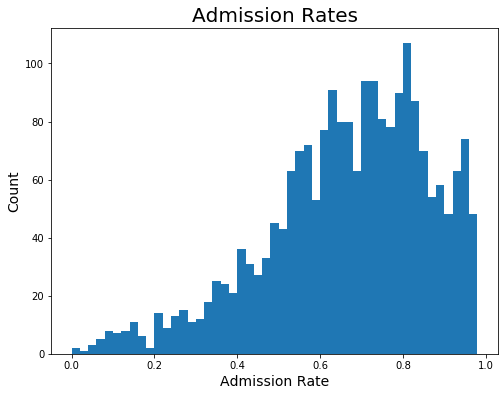

In [29]:
bins = np.arange(0, 1, 0.02)
plt.figure(figsize = (8,6))
plt.hist(df_clean.adm_rate_all, bins = bins)
plt.title('Admission Rates', fontsize = 20)
plt.xlabel('Admission Rate', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.savefig('./plots/adm_rate.png')

## Test Scores: SAT and ACT

In [30]:
m_satvr75 = df_clean.satvr75.median()
m_satvr25 = df_clean.satvr25.median()
m_satvr25, m_satvr75

(500.0, 610.0)

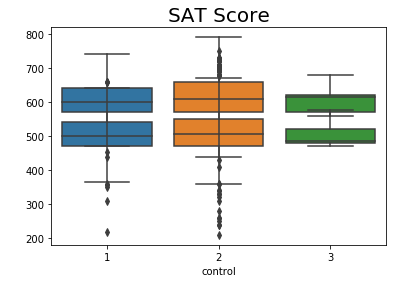

In [31]:
sns.boxplot(data = df_clean,  x = 'control', y = 'satvr25') # x = 'control',
sns.boxplot(data = df_clean,  x = 'control',y = 'satvr75' )
plt.ylabel(' ', fontsize = 14)
plt.title('SAT Score', fontsize = 20)
plt.savefig('./plots/SAT.png')

## Test Score and Admission Rate

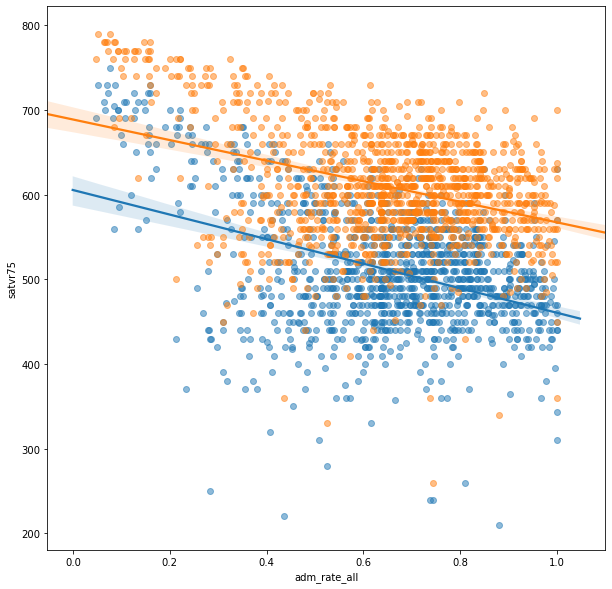

In [32]:
plt.figure(figsize = (10, 10))
sns.regplot(data=df_clean, x='adm_rate_all', y = 'satvr25', scatter_kws = {'alpha' : 1/2})
sns.regplot(data=df_clean, x='adm_rate_all', y = 'satvr75', scatter_kws = {'alpha' : 1/2})


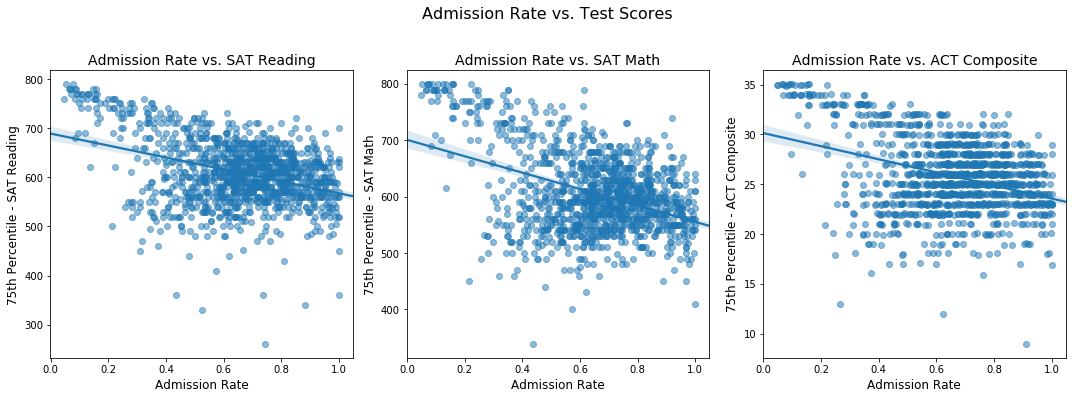

In [33]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.regplot(data=df_clean, x='adm_rate_all', y = 'satvr75', scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. SAT Reading', fontsize = 14)
plt.xlabel('Admission Rate', fontsize = 12)
plt.ylabel('75th Percentile - SAT Reading', fontsize = 12)

plt.subplot(1, 3, 2)
sns.regplot(data=df_clean, x='adm_rate_all', y = 'satmt75', scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. SAT Math', fontsize = 14)
plt.xlabel('Admission Rate', fontsize = 12)
plt.ylabel('75th Percentile - SAT Math', fontsize = 12)

plt.subplot(1, 3, 3)
sns.regplot(data=df_clean, x='adm_rate_all', y = 'actcm75', y_jitter = 0.1, scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. ACT Composite', fontsize = 14)
plt.xlabel('Admission Rate', fontsize = 12)
plt.ylabel('75th Percentile - ACT Composite', fontsize = 12)

plt.suptitle('Admission Rate vs. Test Scores', x = 0.51, y = 1.1, fontsize = 16)
plt.tight_layout();
plt.savefig('./plots/adm_sat.png')

## younger or older students

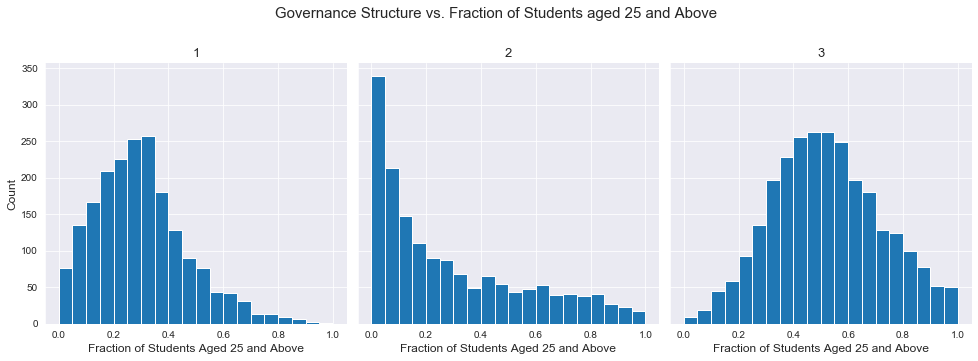

In [34]:
sns.set_style('darkgrid')
# specify bins
bins = np.arange(0, 1 + 0.05, 0.05)

# create a FacetGrid object
g = sns.FacetGrid(data = df_clean, col = 'control', height = 4.5)

# plot
g.map(plt.hist, 'ug25abv', bins = bins)

# label
g.set_titles('{col_name}', size = 13)
g.set_xlabels('Fraction of Students Aged 25 and Above', fontsize = 12)
g.set_ylabels('Count', fontsize = 12)
plt.suptitle('Governance Structure vs. Fraction of Students aged 25 and Above', fontsize = 15, x = 0.5, y = 1.1);

plt.savefig('./plots/ug25abv.png')

In [35]:
df_clean.groupby('control').median()['ug25abv']

control
1    0.2828
2    0.1924
3    0.5068
Name: ug25abv, dtype: float64

In [36]:
df_clean.groupby(['control'])['ugds'].sum().reset_index(name = 'Total Number of Undergrads').merge(
df_clean.groupby(['control'])['ug25abv'].mean().reset_index(name = 'Avg fraction of Undergrads Aged 25 and Above'))

,control,Total Number of Undergrads,Avg fraction of Undergrads Aged 25 and Above
0,1,11547583.0,0.299366
1,2,2782378.0,0.289534
2,3,1116753.0,0.521408


## which type of institutes with regards to their governance structure are more likely to receive a federal loan

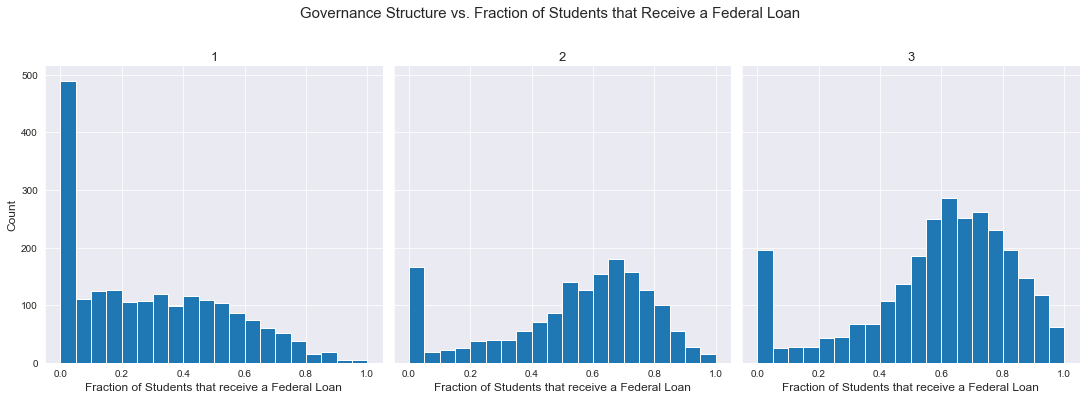

In [37]:
# specify the bins
bins = np.arange(0, 1 + 0.05, 0.05)

# create a FacetGrid object
g = sns.FacetGrid(data = df_clean, col = 'control', height = 5)

# plot
g.map(plt.hist, 'pctfloan', bins = bins)

# label
g.set_titles('{col_name}', size = 13);
g.set_xlabels('Fraction of Students that receive a Federal Loan', fontsize = 12)
g.set_ylabels('Count', fontsize = 12)
plt.suptitle('Governance Structure vs. Fraction of Students that Receive a Federal Loan', fontsize = 15, x = 0.5, y = 1.1);

plt.savefig('./plots/pctfloan.png')

In [38]:
df_clean.groupby('control').mean()['pctfloan']

control
1    0.291804
2    0.535295
3    0.588709
Name: pctfloan, dtype: float64

## Federal Loan

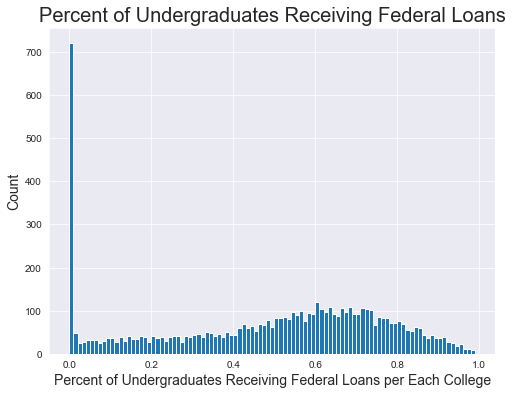

In [39]:
bins = np.arange(0, 1, 0.01)

plt.figure(figsize = (8, 6))
plt.hist(df_clean.pctfloan, bins = bins)

plt.title('Percent of Undergraduates Receiving Federal Loans', fontsize = 20)
plt.xlabel('Percent of Undergraduates Receiving Federal Loans per Each College', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

## Cost vs. Outcome (Earning)

schools with low average costs but relatively high earnings among former students. average costs for each institution against 10-year median earnings, separated by school Governence type.

In [40]:
# combine the cost of full time and part time ('costt4_a','costt4_p',)
# combined value in 'costt4_a'
for i in range(len(df_clean['costt4_a'])):
    if (np.isnan(df_clean['costt4_a' ][i])) :
        df_clean['costt4_a'][i] = df_clean['costt4_p'][i]

C:\Users\yingr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\yingr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [41]:
# 'COSTT4_A','COSTT4_P', Mean (MN_EARN_WNE_P*(10)) and median (MD_EARN_WNE_P*) 
# MN_EARN_WNE_P10, Mean earnings 2014-2015
# Data are available for each year starting six years after a student enrolls in college, up to 10 years after the student enrolls; 

df_1718 = df_clean[['unitid','stabbr', 'control','costt4_a','debt_mdn','cdr3']]
#df_1415
df_cost_rev = df_1718.merge(df_1415, on='unitid')

In [42]:
df_1718.shape , df_1415.shape, df_cost_rev.shape

((7112, 6), (7703, 2), (6569, 7))

In [43]:
df_cost_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6569 entries, 0 to 6568
Data columns (total 7 columns):
unitid             6569 non-null int64
stabbr             6569 non-null object
control            6569 non-null int64
costt4_a           5613 non-null float64
debt_mdn           6490 non-null object
cdr3               5815 non-null float64
mn_earn_wne_p10    5887 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 410.6+ KB


In [44]:
df_cost_rev.dropna(inplace=True)
df_cost_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4643 entries, 0 to 6265
Data columns (total 7 columns):
unitid             4643 non-null int64
stabbr             4643 non-null object
control            4643 non-null int64
costt4_a           4643 non-null float64
debt_mdn           4643 non-null object
cdr3               4643 non-null float64
mn_earn_wne_p10    4643 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 290.2+ KB


In [45]:
df_cost_rev.drop(index=df_cost_rev[df_cost_rev['mn_earn_wne_p10'] == 'PrivacySuppressed'].index, inplace=True)

In [46]:
df_cost_rev['mn_earn_wne_p10'] = df_cost_rev['mn_earn_wne_p10'].astype(str).astype(int)

In [47]:
df_cost_rev.describe()

,unitid,control,costt4_a,cdr3,mn_earn_wne_p10
count,4191.000000,4191.000000,4191.000000,4191.000000,4191.000000
mean,241792.728227,1.977810,25799.099976,0.115049,39245.979480
std,116141.470795,0.841486,13653.469308,0.070844,14146.051084
min,100654.000000,1.000000,6276.000000,0.000000,15500.000000
25%,158098.500000,1.000000,15588.000000,0.056000,29100.000000
50%,203289.000000,2.000000,22474.000000,0.108000,37200.000000
75%,248885.500000,3.000000,30823.000000,0.162000,46500.000000
max,485421.000000,3.000000,72717.000000,0.454000,153600.000000


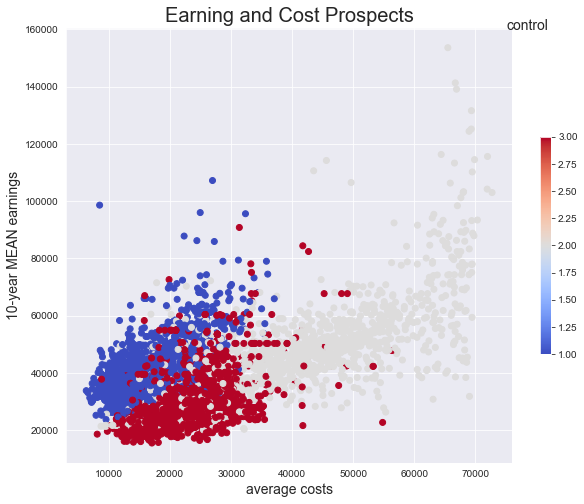

In [48]:
plt.figure(figsize = (10, 8))
plt.scatter(data = df_cost_rev, x = 'costt4_a', y = 'mn_earn_wne_p10', c = 'control', cmap = 'coolwarm') #viridis

# add a colorbar
plt.colorbar(shrink = 0.5)

# label
plt.title('Earning and Cost Prospects', fontsize = 20)
plt.xlabel('average costs', fontsize = 14)
plt.ylabel('10-year MEAN earnings', fontsize = 14)
plt.text(x = 75000, y = 160000, s = 'control',size = 14); 
plt.savefig('./plots/earn_cost.png')

## State Variation

In [49]:
df_1718_debt = df_1718[['stabbr','debt_mdn']]
df_1718_debt.drop(index=df_1718_debt[df_1718_debt['debt_mdn'] == 'PrivacySuppressed'].index, inplace=True)
df_1718_debt.dropna(inplace=True)

C:\Users\yingr\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\yingr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df_1718_debt['debt_mdn'] = df_1718_debt['debt_mdn'].astype(str).astype(int)

C:\Users\yingr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_1718_debt = df_1718_debt.groupby('stabbr')[['debt_mdn']].mean()

In [52]:
df_1718_cost = df_cost_rev.groupby('stabbr')[['costt4_a']].mean()

In [53]:
df_1718_cdr3 = df_1718[['stabbr','cdr3']]
#df_1718_cdr3.drop(index=df_1718_debt[df_1718_debt['debt_mdn'] == 'PrivacySuppressed'].index, inplace=True)
df_1718_cdr3.dropna(inplace=True)
df_1718_cdr3 = df_1718_cdr3.groupby('stabbr')[['cdr3']].mean()

C:\Users\yingr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
df_states = df_1718_debt
df_states = df_states.merge(df_1718_cost, on = 'stabbr')
df_states = df_states.merge(df_1718_cdr3, on = 'stabbr')

In [55]:
# highest / Lowest overall cost for college
print(df_1718_cost['costt4_a'].sort_values()[:10], df_1718_cost['costt4_a'].sort_values()[-10:])

stabbr
PR    13035.867925
GU    13534.000000
WY    14555.500000
VI    16786.000000
NM    17807.714286
ND    18525.526316
AR    19802.745098
AK    20194.000000
MT    20323.235294
MS    20411.166667
Name: costt4_a, dtype: float64 stabbr
VA    28280.173469
CT    28662.428571
NH    29429.535714
IN    29977.253333
PA    30254.534091
NY    30833.684615
MA    36539.950000
RI    37352.647059
DC    39314.307692
VT    41156.333333
Name: costt4_a, dtype: float64


In [56]:
# the highest / Lowest student debt 
print(df_1718_debt['debt_mdn'].sort_values()[:10], df_1718_debt['debt_mdn'].sort_values()[-10:])

stabbr
PR    5833.589041
WY    6442.400000
AR    9153.475610
VI    9321.000000
UT    9742.508197
LA    9760.660550
AK    9816.000000
TX    9824.838875
MS    9826.730769
AZ    9869.232143
Name: debt_mdn, dtype: float64 stabbr
OR    12402.469136
AL    12407.246753
NH    12719.282051
SD    13058.217391
NE    13197.659091
MA    13528.229299
PA    13706.924855
DC    13736.263158
RI    14134.040000
VT    14562.318182
Name: debt_mdn, dtype: float64


In [57]:
# the highest / Lowest debt default rate
print(df_1718_cdr3['cdr3'].sort_values()[:10], df_1718_cdr3['cdr3'].sort_values()[-10:])

stabbr
RI    0.068391
VT    0.069920
IA    0.081329
MA    0.083975
NH    0.085615
NY    0.090182
NE    0.092864
MN    0.093217
PA    0.094205
GU    0.095000
Name: cdr3, dtype: float64 stabbr
ID    0.134829
TX    0.139306
OK    0.142377
WV    0.142412
KY    0.143102
AL    0.144947
NV    0.146462
NM    0.149311
MS    0.156208
AK    0.163875
Name: cdr3, dtype: float64


In [58]:
#  the highest /Lowest overall earnings
df_earn = df_cost_rev.groupby('stabbr')[['mn_earn_wne_p10']].mean()
print(df_earn['mn_earn_wne_p10'].sort_values()[:10], df_earn['mn_earn_wne_p10'].sort_values()[-10:])

stabbr
PR    23296.226415
ID    31900.000000
AR    32560.784314
GU    33300.000000
KY    33446.031746
MS    33566.666667
LA    33762.500000
SC    34005.333333
NV    34200.000000
WV    34460.526316
Name: mn_earn_wne_p10, dtype: float64 stabbr
MD    42576.666667
VT    42638.888889
AK    43116.666667
PA    43360.984848
MN    43435.000000
NY    44764.615385
CT    46078.571429
RI    49076.470588
MA    49743.333333
DC    56284.615385
Name: mn_earn_wne_p10, dtype: float64


In [60]:
df_clean.to_csv('./datasets/df_clean.csv')
df_1415.to_csv('./datasets/df_1415.csv')